# Suicide Rate Exploratory Data Analysis.

In [1]:
import numpy             as np
import pandas            as pd
import scipy.stats       as stats
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
data =pd.read_csv("master.csv")
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
data.shape

(27820, 12)

## info

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


# describe()

In [8]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


# count the datatypes

In [10]:
data.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

# check the missing datasets values

In [14]:
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [13]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis =1,keys=["Total","Percent"])
    return missing_data
missing_check(data)

,Total,Percent
HDI for year,19456,0.699353
generation,0,0.000000
gdp_per_capita ($),0,0.000000
gdp_for_year ($),0,0.000000
country-year,0,0.000000
suicides/100k pop,0,0.000000
population,0,0.000000
suicides_no,0,0.000000
age,0,0.000000
sex,0,0.000000


# crosstab for categorical vaiable

In [16]:
my_tab = pd.crosstab(index=data["age"],columns="count")#make a crosstab,Name the count column
my_tab

col_0,count
age,
15-24 years,4642
25-34 years,4642
35-54 years,4642
5-14 years,4610
55-74 years,4642
75+ years,4642


# barplot to check number of suicides by tail countries

<Figure size 1080x360 with 0 Axes>

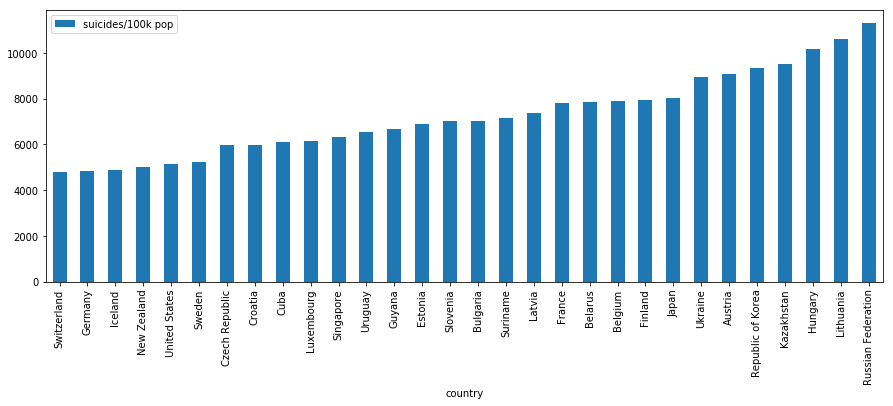

In [20]:
figure = plt.figure(figsize =(15,5))
#data.groupby(by=["country"])["suicides_no"].sum().reset_index().sort_values(["suicides_no"],)figure = plt.figure(figsize=(15,5))
data.groupby(by=['country'])['suicides/100k pop'].sum().reset_index().sort_values(['suicides/100k pop'],
                    ascending=True).tail(30).plot(x='country',y='suicides/100k pop',kind='bar', figsize=(15,5))

# Bar plot to check Number of Suicides by bottom Countries 30 

<Figure size 1080x360 with 0 Axes>

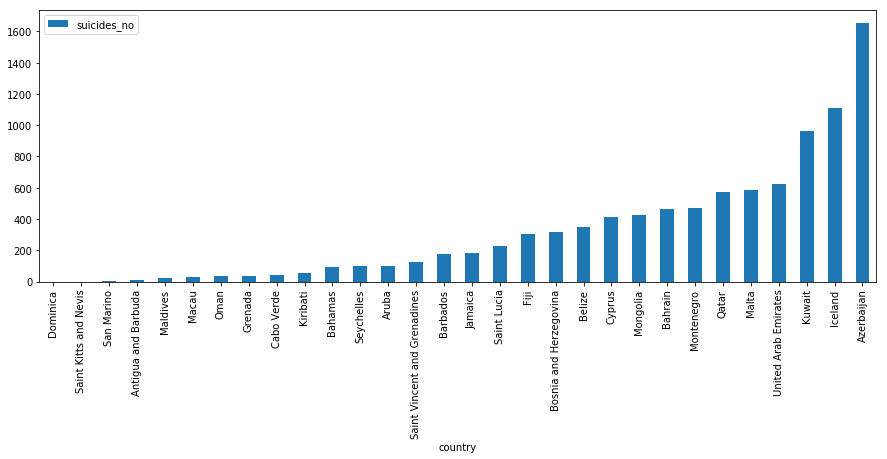

In [26]:
figure = plt.figure(figsize=(15,5))
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],
                    ascending=True).head(30).plot(x='country',y='suicides_no',kind='bar', figsize=(15,5))

# Bar plot for Number of Suicides Vs Age 

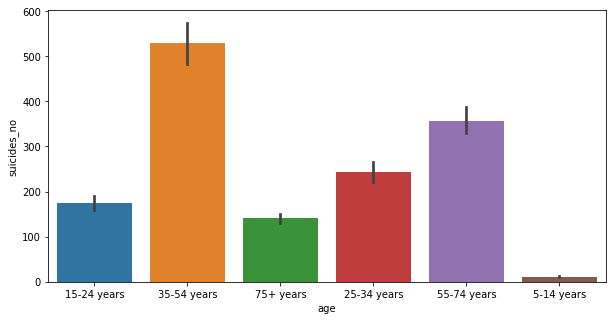

In [28]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="age",y="suicides_no",data=data)

# Bar plot for Number of Suicides Vs gender

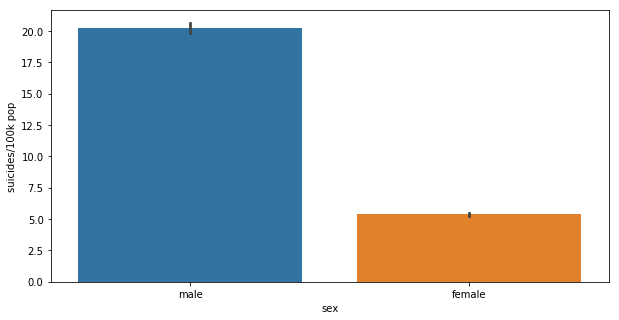

In [32]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="sex",y="suicides/100k pop",data=data)

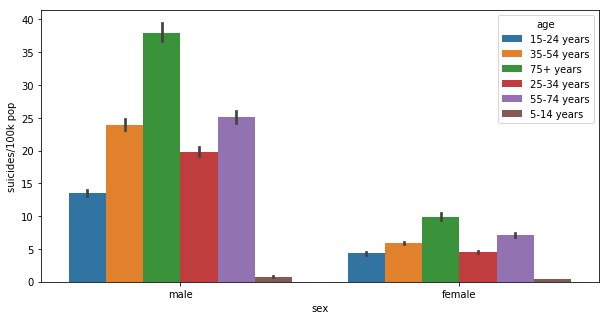

In [35]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="sex",y="suicides/100k pop",data=data,hue="age")

# Bar plot for Number of Suicides Vs generation

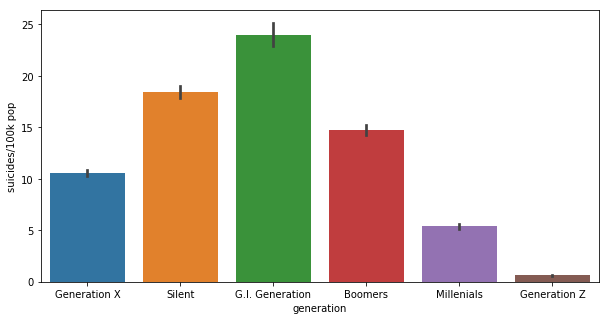

In [33]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="generation",y="suicides/100k pop",data=data)

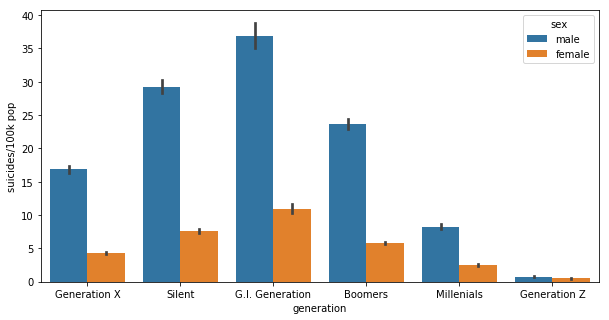

In [34]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="generation",y="suicides/100k pop",data=data,hue ="sex")

# Scatter plot Number of Suicides Vs population 

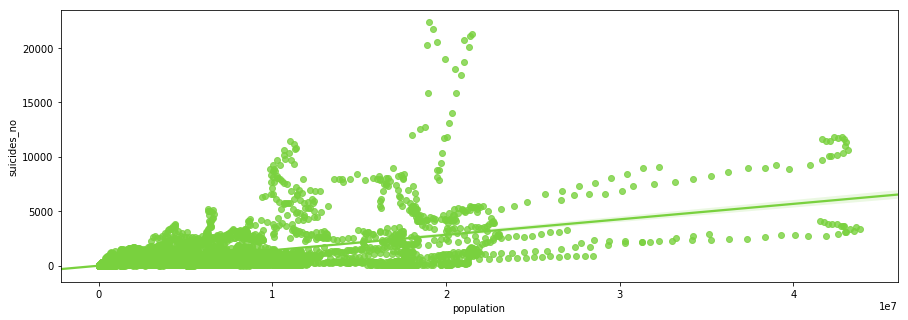

In [36]:
figure = plt.figure(figsize=(15,5))
ax = sns.regplot(x=data['population'],y='suicides_no', data=data, color='#79d13e')

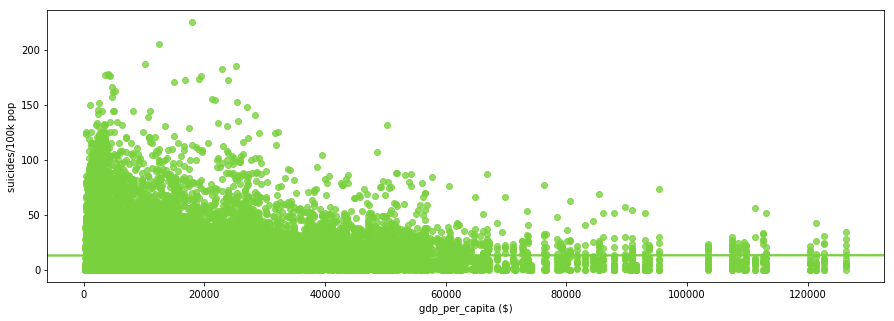

In [41]:
figure = plt.figure(figsize=(15,5))
ax = sns.regplot(x=data['gdp_per_capita ($)'],y='suicides/100k pop', data=data, color='#79d13e')

# Checking the No.of suicides: Country Vs Sex?

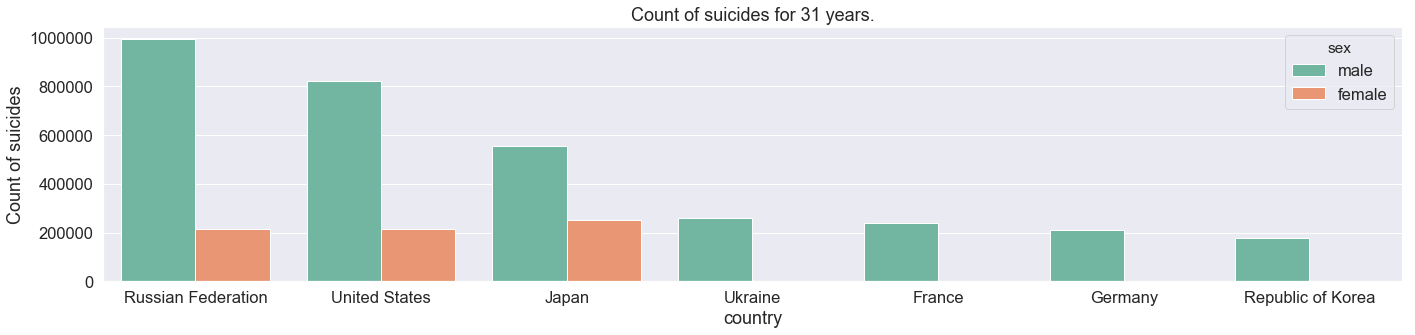

In [43]:
suic_sum_m = data['suicides_no'].groupby([data['country'],data['sex']]).sum()
suic_sum_m = suic_sum_m.reset_index().sort_values(by='suicides_no',ascending=False)
most_cont_m = suic_sum_m.head(10)
most_cont_m.head(10)
fig = plt.figure(figsize=(20,5))
plt.title('Count of suicides for 31 years.')
sns.set(font_scale=1.5)
sns.barplot(y='suicides_no',x='country',hue='sex',data=most_cont_m,palette='Set2');
plt.ylabel('Count of suicides')
plt.tight_layout()

# Checking pattern using Trend plot (1985-2015) suides Rate Vs Years 

<Figure size 1440x360 with 0 Axes>

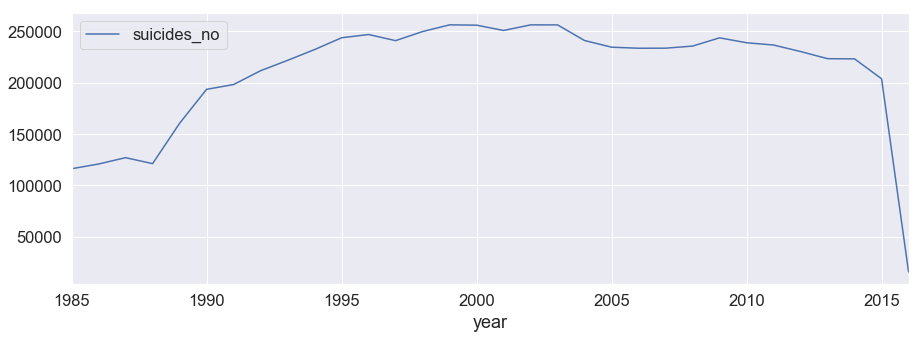

In [46]:
fig = plt.figure(figsize=(20,5))
data[['year','suicides_no']].groupby(['year']).sum().plot(figsize=(15,5))

<Figure size 1440x360 with 0 Axes>

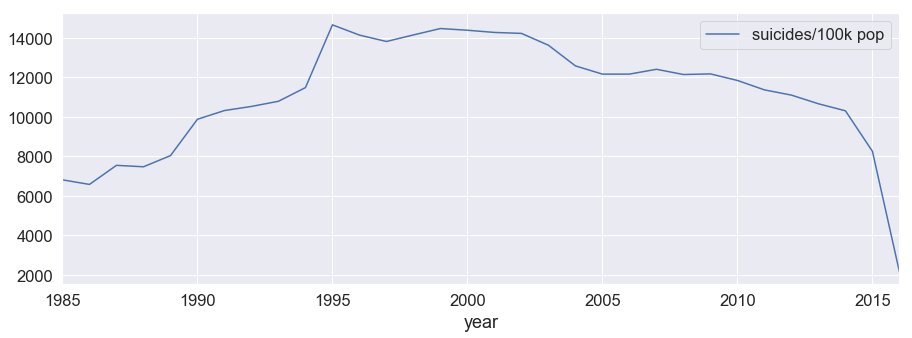

In [47]:
fig = plt.figure(figsize=(20,5))
data[['year','suicides/100k pop']].groupby(['year']).sum().plot(figsize=(15,5))

# Copy the data For Labele Encoding? 

In [66]:
data2 = data.copy()

## Generation

In [67]:
data2["generation"] = data2["generation"].astype("category")
data2.dtypes

country                 object
year                     int64
sex                     object
age                     object
suicides_no              int64
population               int64
suicides/100k pop      float64
country-year            object
HDI for year           float64
 gdp_for_year ($)       object
gdp_per_capita ($)       int64
generation            category
dtype: object

In [68]:
data2["generation"] = data2["generation"].cat.codes
data2.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,2
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,5
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,2
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,1
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,0


# Check the correlation in heat map? 

In [70]:
data =pd.read_csv("master.csv")
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


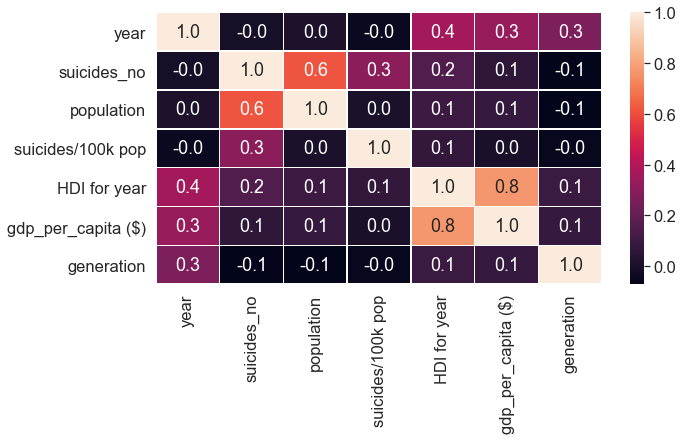

In [72]:
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)